In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from scipy.optimize import curve_fit

In [3]:
r=array(([27.5,32,45,53,71]))
d=array(([2.03718,1.76425,1.24751,1.06388,0.809493]))

In [5]:
def simple(x,a):
    return(a*x)

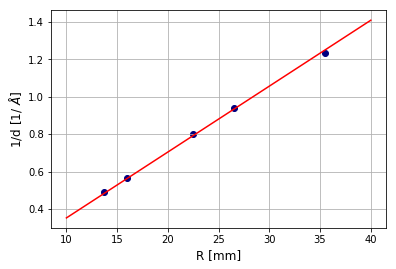

In [14]:
#cc=polyfit(r,1/d,1)
popt,pcov = curve_fit(simple,r/2,1/d)
aa=linspace(10,40,2)
plot(aa,simple(aa,*popt),color='red')
scatter(r/2,1/d,color='navy')
grid(True)
xlabel('R [mm]',fontsize=12)
ylabel('1/d [1/ $\AA$]',fontsize=12)
savefig('./kalib.pdf',bbox_inches='tight')

In [5]:
def calc_dist(x):
    return(1/0.0351774/x)

In [6]:
calc_dist(24.5)

1.1602996961291128

In [27]:
def get_cross(l1,l2):
    aa=cross(l1,l2)
    
    divisors=zeros((3))
    divisors[0]=math.gcd(aa[0],aa[1])
    divisors[1]=math.gcd(aa[1],aa[2])
    divisors[2]=math.gcd(aa[2],aa[0])
    
    return (aa/max(divisors))

In [28]:
l1=[1,1,0]
l2=[-1,-1,6]

get_cross(l1,l2)

array([ 1., -1.,  0.])

In [35]:
def get_four_index_zone(u,v,w):
    un=1/3*(2*u-v)
    vn=1/3*(2*v-u)
    tn=-1/3*(v+u)
    wn=w
    return(array(([un,vn,tn,wn])))

In [22]:
get_four_index_zone(1,-1,0)

(1.0, -1.0, -0.0, 0)

In [29]:
l1=[1,0,0]
l2=[0,0,2]

get_cross(l1,l2)

array([ 0., -1.,  0.])

In [37]:
get_four_index_zone(0,-1,0)*3

array([ 1., -2.,  1.,  0.])

In [38]:
l1=[0,1,2]
l2=[0,1,-4]

get_cross(l1,l2)

array([-1.,  0.,  0.])

In [39]:
get_four_index_zone(-1,0,0)*3

array([-2.,  1.,  1.,  0.])

In [40]:
l1=[1,1,0]
l2=[1,1,2]

get_cross(l1,l2)

array([ 1., -1.,  0.])

In [42]:
get_four_index_zone(1,-1,0)

array([ 1., -1., -0.,  0.])

In [43]:
l1=[1,0,2]
l2=[1,0,0]

get_cross(l1,l2)

array([0., 1., 0.])

In [45]:
get_four_index_zone(0,1,0)*3

array([-1.,  2., -1.,  0.])

In [51]:
l1=[0,0,6]
l2=[-3,0,0]

get_cross(l1,l2)

array([ 0., -1.,  0.])

In [52]:
get_four_index_zone(0,-1,0)*3

array([ 1., -2.,  1.,  0.])

In [55]:
def calc_plane_angle(a,c,hkil,defg):
    h=hkil[0]
    k=hkil[1]
    i=hkil[2]
    l=hkil[3]
    
    d=defg[0]
    e=defg[1]
    f=defg[2]
    g=defg[3]
    
    res=(h*d+k*e+0.5*(h*e+k*d)+3/4*l*g*(a/c)**2)/ \
    sqrt(h**2+k**2+h*k+3/4*l**2*(a/c)**2)*sqrt(d**2+e**2+d*e+3/4*g**2*(a/c)**2)
    
    return res

In [60]:
calc_plane_angle(4.758,3.186,[1,1,-2,0],[1,0,-1,0])

0.8660254037844387

In [61]:
arccos(0.8660254037844387)*180/pi

29.999999999999993